In [4]:
#Importamos las librerias necesarias
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats 
import ast
import json
from collections import Counter


In [2]:
# Cargar el DataFrame Limpio
df = pd.read_csv('Dataset/movies_dataset_cleaned_finish.csv', dtype=object)

#Imprime las dimensiones del DATA FRAME
print(df.shape)

#Muestra la informacion del DATA FRAME
print(df.info())

(45379, 20)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45379 entries, 0 to 45378
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   belongs_to_collection  45379 non-null  object
 1   budget                 45379 non-null  object
 2   genres                 45379 non-null  object
 3   id                     45379 non-null  object
 4   original_language      45379 non-null  object
 5   overview               45379 non-null  object
 6   popularity             45379 non-null  object
 7   production_companies   45379 non-null  object
 8   production_countries   45379 non-null  object
 9   release_date           45376 non-null  object
 10  revenue                45379 non-null  object
 11  runtime                45379 non-null  object
 12  spoken_languages       45379 non-null  object
 13  status                 45379 non-null  object
 14  tagline                45379 non-null  object
 15  title  

Analizamos la columna de generos

In [3]:
# Crear una lista de géneros únicos y ordenarla
unique_genres = sorted(list(set(genre for genres_list in df['genres'] if isinstance(genres_list, str) for genre in genres_list.split(", "))))

# Crear un diccionario que mapee géneros únicos a identificadores
genre_to_id = {genre: idx for idx, genre in enumerate(unique_genres)}

# Crear una lista de géneros para cada película usando los identificadores
def get_genre_ids(genres_list):
    if isinstance(genres_list, str):
        return [genre_to_id[genre] for genre in genres_list.split(", ")]
    else:
        return []

df['genre_ids'] = df['genres'].apply(get_genre_ids)

# Mostrar las primeras 15 filas para verificar
print(df['genre_ids'].head(15))


0        [2, 6, 10]
1       [1, 11, 10]
2           [22, 6]
3        [6, 9, 22]
4               [6]
5     [0, 7, 9, 28]
6           [6, 22]
7     [0, 1, 9, 10]
8        [0, 1, 28]
9        [1, 0, 28]
10       [6, 9, 22]
11          [6, 15]
12       [10, 2, 1]
13          [14, 9]
14           [0, 1]
Name: genre_ids, dtype: object


In [4]:
# Cambiar la columna Popularity a valores numéricos y reemplazar valores faltantes con 0
df['popularity'] = pd.to_numeric(df['popularity'])


# Crear un diccionario para almacenar la suma de popularidades y el recuento de películas por género
popularity_by_genre = {}

# Iterar a través de cada fila del DataFrame
for index, row in df.iterrows():
    genre_ids = row['genre_ids']
    popularity = row['popularity']
    
    for genre_id in genre_ids:
        if genre_id not in popularity_by_genre:
            popularity_by_genre[genre_id] = {'popularity_sum': 0, 'movie_count': 0}
        popularity_by_genre[genre_id]['popularity_sum'] += popularity
        popularity_by_genre[genre_id]['movie_count'] += 1

# Calcular la popularidad promedio para cada género
for genre_id, data in popularity_by_genre.items():
    data['average_popularity'] = data['popularity_sum'] / data['movie_count']


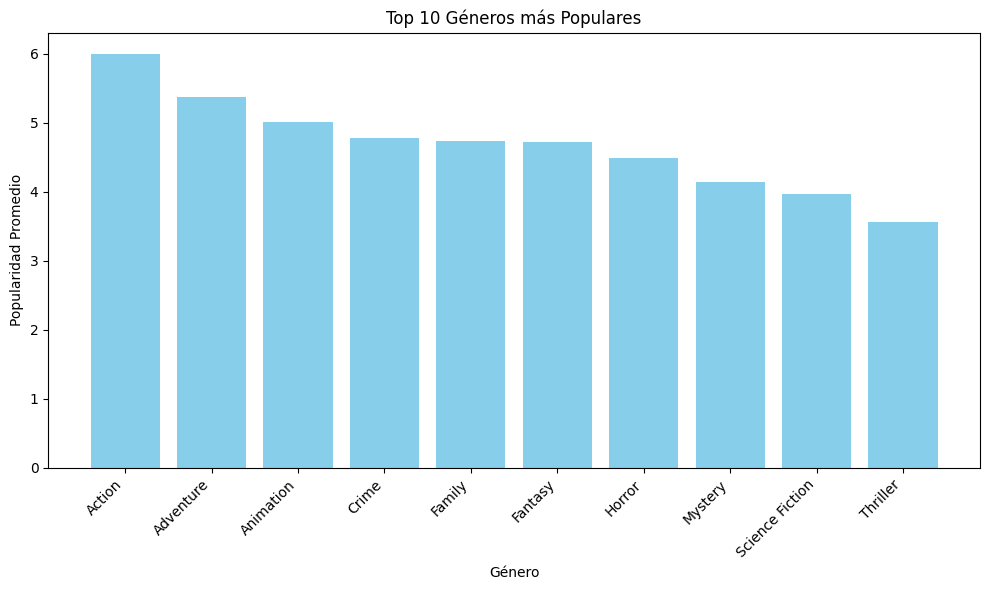

In [5]:
# Ordenar los géneros por popularidad promedio de mayor a menor
sorted_genres = sorted(popularity_by_genre.items(), key=lambda x: x[1]['average_popularity'], reverse=True)

# Seleccionar los 10 géneros más populares
top_genres = sorted_genres[:10]

# Obtener los IDs de los géneros
genre_ids = [genre_id for genre_id, _ in top_genres]

# Obtener los nombres de género correspondientes a los IDs
genre_names = [genre for genre, genre_id in genre_to_id.items() if genre_id in genre_ids]

# Obtener la popularidad promedio de los géneros
average_popularity = [data['average_popularity'] for _, data in top_genres]

# Generar el gráfico de barras verticales
plt.figure(figsize=(10, 6))
plt.bar(genre_names, average_popularity, color='skyblue')
plt.xlabel('Género')
plt.ylabel('Popularidad Promedio')
plt.title('Top 10 Géneros más Populares')
plt.xticks(rotation=45, ha='right')  # Rotar las etiquetas del eje x para una mejor visualización
plt.tight_layout()
plt.show()



In [6]:
# Obtener los IDs de los géneros
genre_ids = [genre_id for genre_id, _ in top_genres]

# Obtener la popularidad promedio de los géneros
average_popularity = [data['average_popularity'] for _, data in top_genres]

# Imprimir los valores numéricos de popularidad promedio
for genre_id, popularity in zip(genre_ids, average_popularity):
    print(f'Género ID: {genre_id}, Popularidad Promedio: {popularity}')


Género ID: 1, Popularidad Promedio: 5.9993301216371036
Género ID: 11, Popularidad Promedio: 5.363655929096415
Género ID: 23, Popularidad Promedio: 5.005095041091394
Género ID: 0, Popularidad Promedio: 4.772894958434459
Género ID: 10, Popularidad Promedio: 4.732718788294808
Género ID: 2, Popularidad Promedio: 4.7168934917184275
Género ID: 28, Popularidad Promedio: 4.4897960651004265
Género ID: 7, Popularidad Promedio: 4.145387201393732
Género ID: 18, Popularidad Promedio: 3.9631899476461085
Género ID: 15, Popularidad Promedio: 3.5652689027837363


Analizamos la columna de Lenguajes

In [7]:
# Crear una lista de idiomas únicos y ordenarla
unique_languages = sorted(list(set(language for languages_list in df['spoken_languages'] if isinstance(languages_list, str) for language in languages_list.split(", "))))

# Crear un diccionario que mapee idiomas únicos a identificadores
language_to_id = {language: idx for idx, language in enumerate(unique_languages)}

# Crear una lista de idiomas para cada película usando los identificadores
def get_language_ids(languages_list):
    if isinstance(languages_list, str):
        return [language_to_id[language] for language in languages_list.split(", ")]
    else:
        return []

df['language_ids'] = df['spoken_languages'].apply(get_language_ids)

# Mostrar las primeras 15 filas para verificar
print(df['language_ids'].head(15))


0             [15]
1         [15, 18]
2             [15]
3             [15]
4             [15]
5         [15, 16]
6         [18, 15]
7         [15, 13]
8             [15]
9     [15, 37, 16]
10            [15]
11        [15, 13]
12            [15]
13            [15]
14        [15, 27]
Name: language_ids, dtype: object


In [8]:
# Cambiar la columna Popularity a valores numéricos y reemplazar valores faltantes con 0
df['popularity'] = pd.to_numeric(df['popularity'])

# Crear un diccionario para almacenar la suma de popularidades y el recuento de películas por idioma
popularity_by_language = {}

# Iterar a través de cada fila del DataFrame
for index, row in df.iterrows():
    language_ids = row['language_ids']
    popularity = row['popularity']
    
    for language_id in language_ids:
        if language_id not in popularity_by_language:
            popularity_by_language[language_id] = {'popularity_sum': 0, 'movie_count': 0}
        popularity_by_language[language_id]['popularity_sum'] += popularity
        popularity_by_language[language_id]['movie_count'] += 1

# Calcular la popularidad promedio para cada idioma
for language_id, data in popularity_by_language.items():
    data['average_popularity'] = data['popularity_sum'] / data['movie_count']


C:\Users\David\AppData\Local\Temp\ipykernel_6500\2442584223.py:20: UserWarning: Glyph 3616 (\N{THAI CHARACTER PHO SAMPHAO}) missing from current font.
  plt.tight_layout()
C:\Users\David\AppData\Local\Temp\ipykernel_6500\2442584223.py:20: UserWarning: Glyph 3634 (\N{THAI CHARACTER SARA AA}) missing from current font.
  plt.tight_layout()
C:\Users\David\AppData\Local\Temp\ipykernel_6500\2442584223.py:20: UserWarning: Glyph 3625 (\N{THAI CHARACTER SO RUSI}) missing from current font.
  plt.tight_layout()
C:\Users\David\AppData\Local\Temp\ipykernel_6500\2442584223.py:20: UserWarning: Glyph 3652 (\N{THAI CHARACTER SARA AI MAIMALAI}) missing from current font.
  plt.tight_layout()
C:\Users\David\AppData\Local\Temp\ipykernel_6500\2442584223.py:20: UserWarning: Glyph 3607 (\N{THAI CHARACTER THO THAHAN}) missing from current font.
  plt.tight_layout()
C:\Users\David\AppData\Local\Temp\ipykernel_6500\2442584223.py:20: UserWarning: Glyph 3618 (\N{THAI CHARACTER YO YAK}) missing from current font

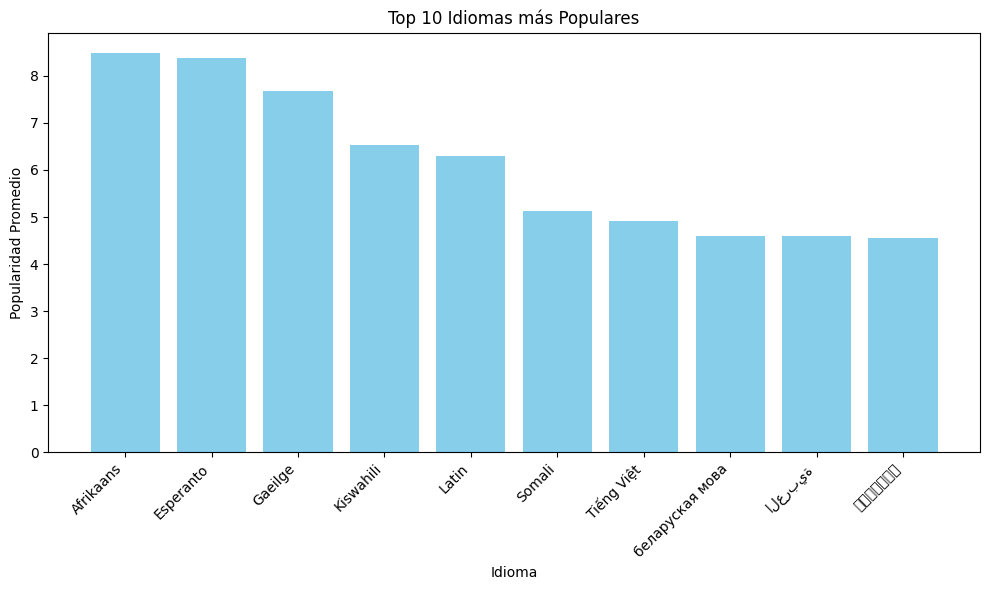

In [9]:
# Ordenar los idiomas por popularidad promedio de mayor a menor
sorted_languages = sorted(popularity_by_language.items(), key=lambda x: x[1]['average_popularity'], reverse=True)

# Seleccionar los 10 idiomas más populares
top_languages = sorted_languages[:10]

# Obtener los nombres de idioma correspondientes a los IDs
language_names = [language for language, language_id in language_to_id.items() if language_id in [language_id for language_id, _ in top_languages]]

# Obtener la popularidad promedio de los idiomas
average_popularity_languages = [data['average_popularity'] for _, data in top_languages]

# Generar el gráfico de barras verticales
plt.figure(figsize=(10, 6))
plt.bar(language_names, average_popularity_languages, color='skyblue')
plt.xlabel('Idioma')
plt.ylabel('Popularidad Promedio')
plt.title('Top 10 Idiomas más Populares')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [10]:
# Ordenar los idiomas por popularidad promedio de mayor a menor
sorted_languages = sorted(popularity_by_language.items(), key=lambda x: x[1]['average_popularity'], reverse=True)

# Seleccionar los 10 idiomas más populares
top_languages = sorted_languages[:10]

# Obtener la popularidad promedio de los idiomas
average_popularity_languages = [data['average_popularity'] for _, data in top_languages]

# Imprimir los valores numéricos de popularidad promedio de los 10 idiomas más populares
for idx, popularity in enumerate(average_popularity_languages, start=1):
    print(f"Posición {idx}: Popularidad Promedio: {popularity:.2f}")


Posición 1: Popularidad Promedio: 8.49
Posición 2: Popularidad Promedio: 8.39
Posición 3: Popularidad Promedio: 7.68
Posición 4: Popularidad Promedio: 6.54
Posición 5: Popularidad Promedio: 6.30
Posición 6: Popularidad Promedio: 5.12
Posición 7: Popularidad Promedio: 4.91
Posición 8: Popularidad Promedio: 4.61
Posición 9: Popularidad Promedio: 4.61
Posición 10: Popularidad Promedio: 4.56


Idioma: English, Cantidad de Películas: 22380
Idioma: undefined, Cantidad de Películas: 3894
Idioma: Français, Cantidad de Películas: 1852
Idioma: 日本語, Cantidad de Películas: 1289
Idioma: Italiano, Cantidad de Películas: 1217
Idioma: Español, Cantidad de Películas: 901
Idioma: Pусский, Cantidad de Películas: 807
Idioma: Deutsch, Cantidad de Películas: 761
Idioma: हिन्दी, Cantidad de Películas: 481
Idioma: 한국어/조선말, Cantidad de Películas: 425


C:\Users\David\AppData\Local\Temp\ipykernel_6500\2528386500.py:24: UserWarning: Glyph 26085 (\N{CJK UNIFIED IDEOGRAPH-65E5}) missing from current font.
  plt.tight_layout()
C:\Users\David\AppData\Local\Temp\ipykernel_6500\2528386500.py:24: UserWarning: Glyph 26412 (\N{CJK UNIFIED IDEOGRAPH-672C}) missing from current font.
  plt.tight_layout()
C:\Users\David\AppData\Local\Temp\ipykernel_6500\2528386500.py:24: UserWarning: Glyph 35486 (\N{CJK UNIFIED IDEOGRAPH-8A9E}) missing from current font.
  plt.tight_layout()
C:\Users\David\AppData\Local\Temp\ipykernel_6500\2528386500.py:24: UserWarning: Glyph 2361 (\N{DEVANAGARI LETTER HA}) missing from current font.
  plt.tight_layout()
C:\Users\David\AppData\Local\Temp\ipykernel_6500\2528386500.py:24: UserWarning: Matplotlib currently does not support Devanagari natively.
  plt.tight_layout()
C:\Users\David\AppData\Local\Temp\ipykernel_6500\2528386500.py:24: UserWarning: Glyph 2367 (\N{DEVANAGARI VOWEL SIGN I}) missing from current font.
  plt.t

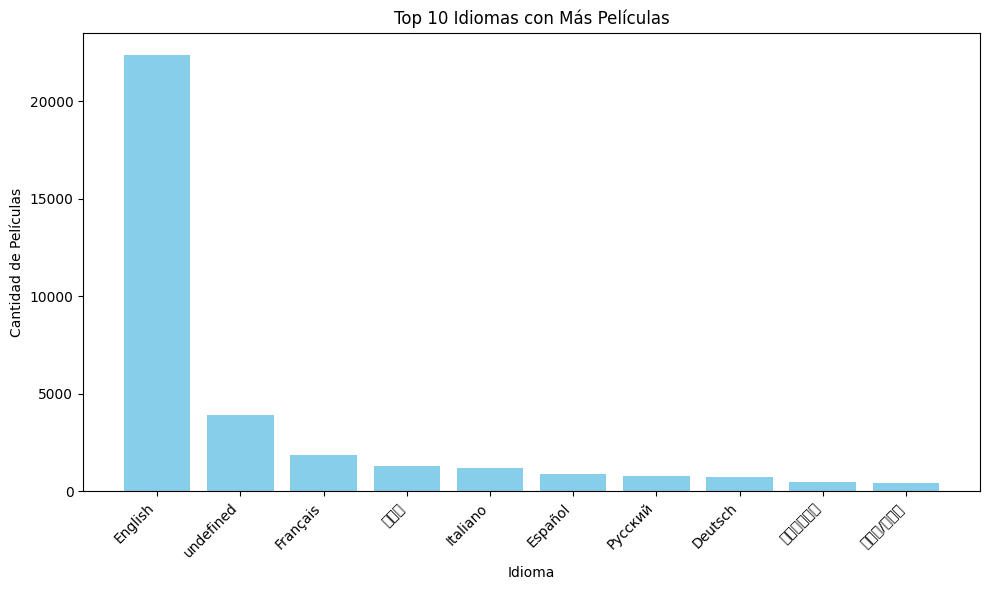

In [11]:
# Obtener la cantidad de películas por idioma
language_counts = Counter(df['spoken_languages'].explode())

# Crear una lista con los nombres de idioma y la cantidad de películas
language_movie_counts = [(language, language_counts[language]) for language in language_to_id]

# Ordenar la lista por la cantidad de películas en orden descendente
language_movie_counts.sort(key=lambda x: x[1], reverse=True)

# Tomar los 10 idiomas con más películas
top_languages = language_movie_counts[:10]

# Mostrar la cantidad de películas por idioma
for language, movie_count in top_languages:
    print(f"Idioma: {language}, Cantidad de Películas: {movie_count}")

# Generar el gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar([language for language, _ in top_languages], [movie_count for _, movie_count in top_languages], color='skyblue')
plt.xlabel('Idioma')
plt.ylabel('Cantidad de Películas')
plt.title('Top 10 Idiomas con Más Películas')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Analizaremos los Paises

In [12]:
# Crear una lista de países únicos y ordenarla
unique_countries = sorted(list(set(country for countries_list in df['production_countries'] if isinstance(countries_list, str) for country in countries_list.split(", "))))

# Crear un diccionario que mapee países únicos a identificadores
country_to_id = {country: idx for idx, country in enumerate(unique_countries)}

# Crear una lista de países para cada película usando los identificadores
def get_country_ids(countries_list):
    if isinstance(countries_list, str):
        return [country_to_id[country] for country in countries_list.split(", ")]
    else:
        return []

df['country_ids'] = df['production_countries'].apply(get_country_ids)

# Mostrar las primeras 15 filas para verificar
print(df['country_ids'].head(15))


0                 [153]
1                 [153]
2                 [153]
3                 [153]
4                 [153]
5                 [153]
6             [54, 153]
7                 [153]
8                 [153]
9            [151, 153]
10                [153]
11            [50, 153]
12                [153]
13                [153]
14    [50, 54, 70, 153]
Name: country_ids, dtype: object


In [13]:
country_to_id

{'Afghanistan': 0,
 'Albania': 1,
 'Algeria': 2,
 'Angola': 3,
 'Antarctica': 4,
 'Argentina': 5,
 'Armenia': 6,
 'Aruba': 7,
 'Australia': 8,
 'Austria': 9,
 'Azerbaijan': 10,
 'Bahamas': 11,
 'Bangladesh': 12,
 'Barbados': 13,
 'Belarus': 14,
 'Belgium': 15,
 'Bermuda': 16,
 'Bhutan': 17,
 'Bolivia': 18,
 'Bosnia and Herzegovina': 19,
 'Botswana': 20,
 'Brazil': 21,
 'Brunei Darussalam': 22,
 'Bulgaria': 23,
 'Burkina Faso': 24,
 'Cambodia': 25,
 'Cameroon': 26,
 'Canada': 27,
 'Cayman Islands': 28,
 'Chad': 29,
 'Chile': 30,
 'China': 31,
 'Colombia': 32,
 'Congo': 33,
 'Costa Rica': 34,
 "Cote D'Ivoire": 35,
 'Croatia': 36,
 'Cuba': 37,
 'Cyprus': 38,
 'Czech Republic': 39,
 'Czechoslovakia': 40,
 'Denmark': 41,
 'Dominican Republic': 42,
 'East Germany': 43,
 'Ecuador': 44,
 'Egypt': 45,
 'El Salvador': 46,
 'Estonia': 47,
 'Ethiopia': 48,
 'Finland': 49,
 'France': 50,
 'French Polynesia': 51,
 'French Southern Territories': 52,
 'Georgia': 53,
 'Germany': 54,
 'Ghana': 55,
 'Gib

In [14]:
# Crear una lista de países únicos y ordenarla
unique_countries = sorted(list(set(country for countries_list in df['production_countries'] if isinstance(countries_list, str) for country in countries_list.split(", "))))

# Crear un diccionario que mapee países únicos a identificadores
country_to_id = {country: idx for idx, country in enumerate(unique_countries)}

# Crear una lista de países para cada película usando los identificadores
def get_country_ids(countries_list):
    if isinstance(countries_list, str):
        return [country_to_id[country] for country in countries_list.split(", ")]
    else:
        return []

df['country_ids'] = df['production_countries'].apply(get_country_ids)

# Crear un diccionario para almacenar la suma de popularidades y el recuento de películas por país
popularity_by_country = {}

# Iterar a través de cada fila del DataFrame
for index, row in df.iterrows():
    country_ids = row['country_ids']
    popularity = row['popularity']
    
    for country_id in country_ids:
        if country_id not in popularity_by_country:
            popularity_by_country[country_id] = {'popularity_sum': 0, 'movie_count': 0}
        popularity_by_country[country_id]['popularity_sum'] += popularity
        popularity_by_country[country_id]['movie_count'] += 1

# Calcular la popularidad promedio para cada país
for country_id, data in popularity_by_country.items():
    data['average_popularity'] = data['popularity_sum'] / data['movie_count']

# Mostrar las primeras 10 entradas del diccionario de popularidad por país
for country_id, data in list(popularity_by_country.items())[:10]:
    print(f"País ID: {country_id}, Popularidad Promedio: {data['average_popularity']:.2f}")


País ID: 153, Popularidad Promedio: 4.30
País ID: 54, Popularidad Promedio: 3.42
País ID: 151, Popularidad Promedio: 4.34
País ID: 50, Popularidad Promedio: 3.08
País ID: 70, Popularidad Promedio: 2.27
País ID: 136, Popularidad Promedio: 2.82
País ID: 31, Popularidad Promedio: 4.62
País ID: 8, Popularidad Promedio: 4.52
País ID: 133, Popularidad Promedio: 4.62
País ID: 27, Popularidad Promedio: 3.83


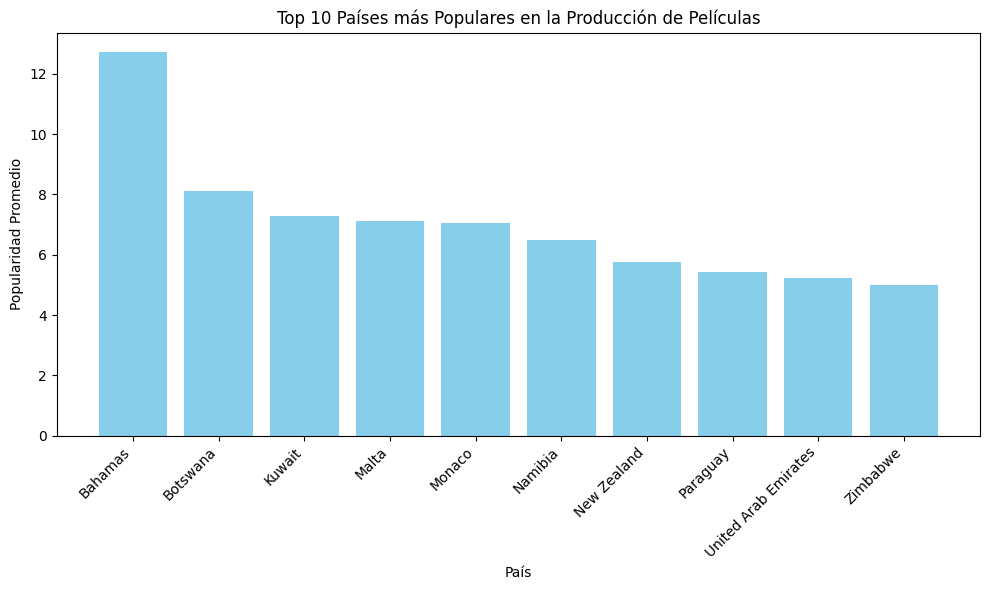

In [15]:
# Ordenar los países por popularidad promedio de mayor a menor
sorted_countries = sorted(popularity_by_country.items(), key=lambda x: x[1]['average_popularity'], reverse=True)

# Seleccionar los 10 países más populares
top_popular_countries = sorted_countries[:10]

# Obtener los nombres de país correspondientes a los IDs de los 10 países más populares
top_country_names = [country for country, country_id in country_to_id.items() if country_id in [country_id for country_id, _ in top_popular_countries]]

# Obtener la popularidad promedio de los 10 países más populares
top_average_popularity_countries = [data['average_popularity'] for _, data in top_popular_countries]

# Generar el gráfico de barras verticales para los 10 países más populares
plt.figure(figsize=(10, 6))
plt.bar(top_country_names, top_average_popularity_countries, color='skyblue')
plt.xlabel('País')
plt.ylabel('Popularidad Promedio')
plt.title('Top 10 Países más Populares en la Producción de Películas')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


País: United States of America, Cantidad de Películas: 17846
País: undefined, Cantidad de Películas: 6214
País: United Kingdom, Cantidad de Películas: 2235
País: France, Cantidad de Películas: 1653
País: Japan, Cantidad de Películas: 1356
País: Italy, Cantidad de Películas: 1029
País: Canada, Cantidad de Películas: 840
País: Germany, Cantidad de Películas: 749
País: India, Cantidad de Películas: 735
País: Russia, Cantidad de Películas: 734


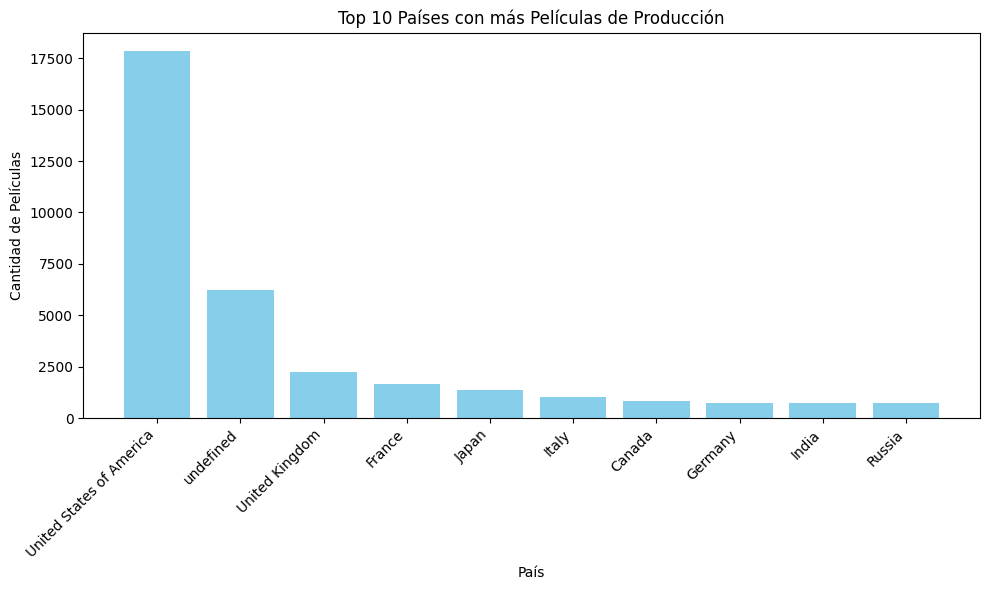

In [16]:
from collections import Counter

# Contar cuántas veces aparece un país en cada registro
country_counts = Counter(df['production_countries'].explode())

# Mostrar los valores numéricos de cuántas películas fueron grabadas en cada país (solo los 10 más comunes)
top_countries = country_counts.most_common(10)
for country, count in top_countries:
    print(f"País: {country}, Cantidad de Películas: {count}")

# Generar el gráfico de barras para mostrar cuántas películas fueron grabadas en cada país (solo los 10 más comunes)
plt.figure(figsize=(10, 6))
plt.bar([country for country, _ in top_countries], [count for _, count in top_countries], color='skyblue')
plt.xlabel('País')
plt.ylabel('Cantidad de Películas')
plt.title('Top 10 Países con más Películas de Producción')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


Analizamos la columna Original_language

In [17]:
# Crear una lista de idiomas únicos y ordenarla
unique_languages = sorted(df['original_language'].unique())

# Crear un diccionario que mapee idiomas únicos a identificadores
language_to_id = {language: idx for idx, language in enumerate(unique_languages)}


In [18]:
# Crear un diccionario para almacenar la suma de popularidades y el recuento de películas por idioma
popularity_by_language = {}

# Iterar a través de cada fila del DataFrame
for index, row in df.iterrows():
    language_id = language_to_id.get(row['original_language'])
    popularity = row['popularity']
    
    if language_id is not None:
        if language_id not in popularity_by_language:
            popularity_by_language[language_id] = {'popularity_sum': 0, 'movie_count': 0}
        popularity_by_language[language_id]['popularity_sum'] += popularity
        popularity_by_language[language_id]['movie_count'] += 1

# Calcular la popularidad promedio para cada idioma
for language_id, data in popularity_by_language.items():
    data['average_popularity'] = data['popularity_sum'] / data['movie_count']


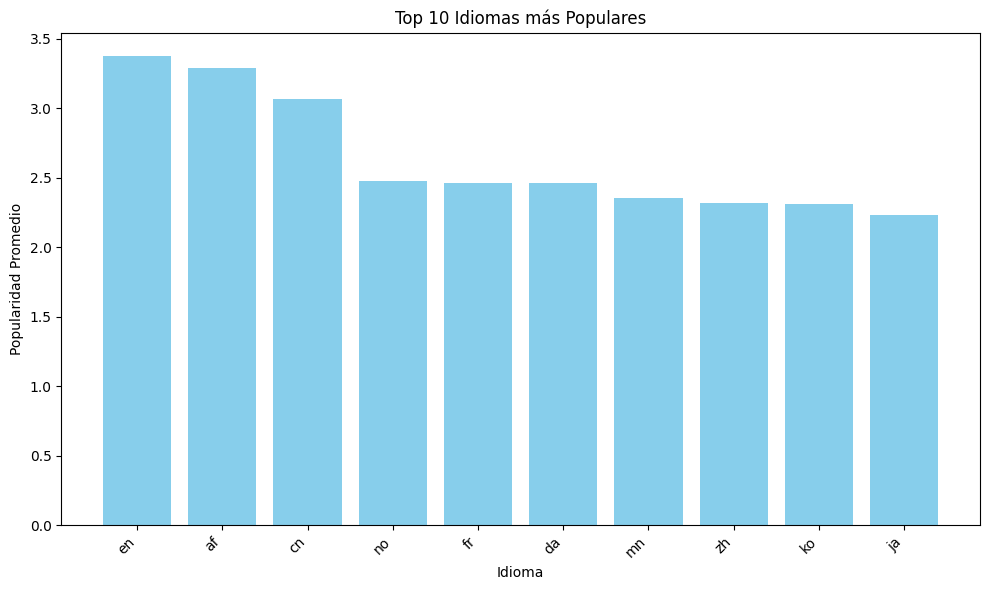

In [19]:
# Ordenar los idiomas por popularidad promedio de mayor a menor
sorted_languages = sorted(popularity_by_language.items(), key=lambda x: x[1]['average_popularity'], reverse=True)

# Seleccionar los 10 idiomas más populares
top_languages = sorted_languages[:10]

# Generar el gráfico de barras verticales
plt.figure(figsize=(10, 6))
plt.bar([unique_languages[language_id] for language_id, _ in top_languages], [data['average_popularity'] for _, data in top_languages], color='skyblue')
plt.xlabel('Idioma')
plt.ylabel('Popularidad Promedio')
plt.title('Top 10 Idiomas más Populares')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [20]:
from collections import Counter

# Contar cuántas veces aparece un idioma en la columna "original_language"
language_counts = Counter(df['original_language'])

# Mostrar los valores numéricos de cuántas películas están en cada idioma (solo los 10 más comunes)
top_languages_count = language_counts.most_common(10)
for language, count in top_languages_count:
    print(f"Idioma: {language}, Cantidad de Películas: {count}")


Idioma: en, Cantidad de Películas: 32202
Idioma: fr, Cantidad de Películas: 2437
Idioma: it, Cantidad de Películas: 1528
Idioma: ja, Cantidad de Películas: 1349
Idioma: de, Cantidad de Películas: 1078
Idioma: es, Cantidad de Películas: 992
Idioma: ru, Cantidad de Películas: 822
Idioma: hi, Cantidad de Películas: 508
Idioma: ko, Cantidad de Películas: 444
Idioma: zh, Cantidad de Películas: 408


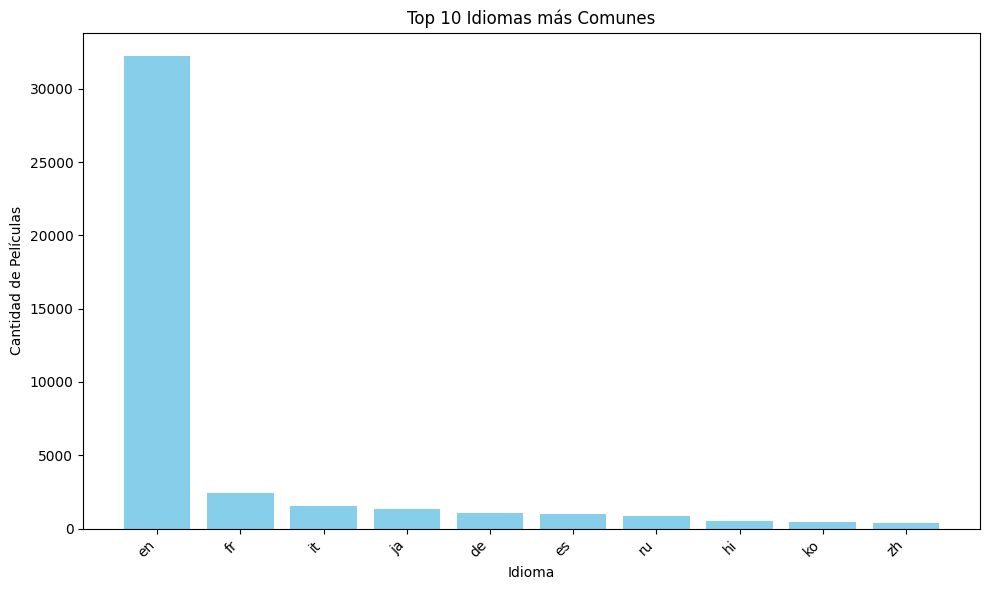

In [21]:
# Obtener los nombres de los idiomas y las cantidades
language_names = [language for language, _ in top_languages_count]
language_counts = [count for _, count in top_languages_count]

# Generar el gráfico de barras verticales
plt.figure(figsize=(10, 6))
plt.bar(language_names, language_counts, color='skyblue')
plt.xlabel('Idioma')
plt.ylabel('Cantidad de Películas')
plt.title('Top 10 Idiomas más Comunes')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Analizamos la columna Production_companies

In [22]:
from collections import defaultdict

# Crear un diccionario para asignar IDs a las compañías de producción
company_to_id = defaultdict(int)
current_id = 0

# Recorrer la columna "production_companies" y asignar IDs a las compañías de producción
for companies_list in df['production_companies']:
    if isinstance(companies_list, str):
        companies = companies_list.split(", ")
        for company in companies:
            if company not in company_to_id:
                company_to_id[company] = current_id
                current_id += 1

# Mostrar el diccionario de compañías con sus IDs asignados
print(company_to_id)


defaultdict(<class 'int'>, {'Pixar Animation Studios': 0, 'TriStar Pictures': 1, 'Teitler Film': 2, 'Interscope Communications': 3, 'Warner Bros.': 4, 'Lancaster Gate': 5, 'Twentieth Century Fox Film Corporation': 6, 'Sandollar Productions': 7, 'Touchstone Pictures': 8, 'Regency Enterprises': 9, 'Forward Pass': 10, 'Paramount Pictures': 11, 'Scott Rudin Productions': 12, 'Mirage Enterprises': 13, 'Constellation Entertainment': 14, 'Worldwide': 15, 'Mont Blanc Entertainment GmbH': 16, 'Walt Disney Pictures': 17, 'Universal Pictures': 18, 'Imperial Entertainment': 19, 'Signature Entertainment': 20, 'United Artists': 21, 'Eon Productions': 22, 'Columbia Pictures': 23, 'Castle Rock Entertainment': 24, 'Enigma Pictures': 25, 'Amblin Entertainment': 26, 'Amblimation': 27, 'Hollywood Pictures': 28, 'Cinergi Pictures Entertainment': 29, 'Le Studio Canal+': 30, 'Laurence Mark Productions': 31, 'Metro-Goldwyn-Mayer (MGM)': 32, 'Carolco Pictures': 33, 'Légende Entreprises': 34, 'Syalis DA': 35, '

In [23]:
# Crear un diccionario para almacenar la suma de popularidades y el recuento de películas por compañía de producción
popularity_by_company = defaultdict(lambda: {'popularity_sum': 0, 'movie_count': 0})

# Iterar a través de cada fila del DataFrame
for index, row in df.iterrows():
    companies_list = row['production_companies']
    popularity = row['popularity']
    
    if isinstance(companies_list, str):
        companies = companies_list.split(", ")
        for company in companies:
            popularity_by_company[company]['popularity_sum'] += popularity
            popularity_by_company[company]['movie_count'] += 1

# Calcular la popularidad promedio para cada compañía de producción
for company, data in popularity_by_company.items():
    data['average_popularity'] = data['popularity_sum'] / data['movie_count']


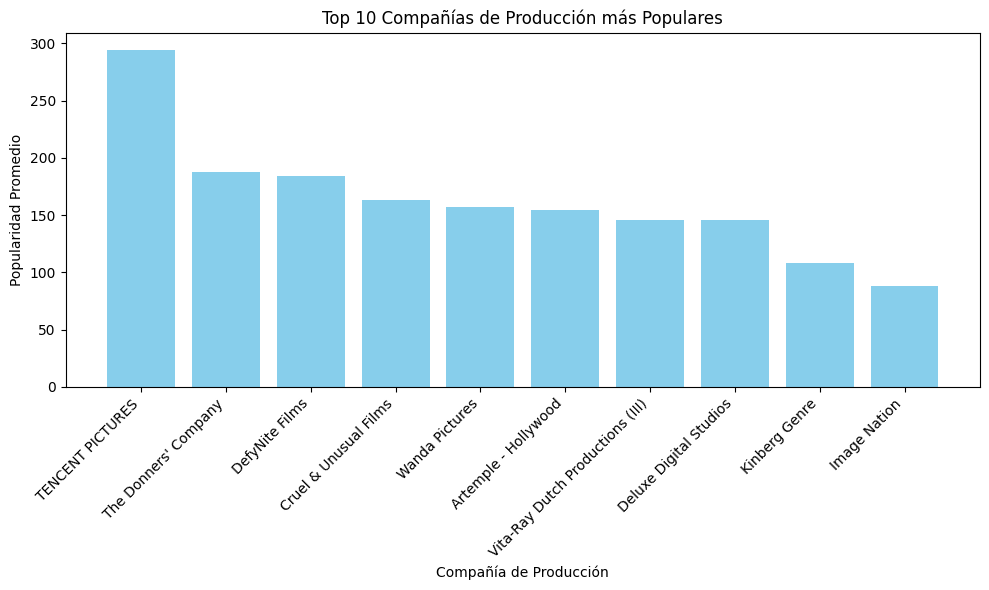

In [24]:
import matplotlib.pyplot as plt

# Ordenar las compañías de producción por popularidad promedio de mayor a menor
sorted_companies = sorted(popularity_by_company.items(), key=lambda x: x[1]['average_popularity'], reverse=True)

# Seleccionar las 10 compañías de producción más populares
top_popular_companies = sorted_companies[:10]

# Obtener los nombres de compañía correspondientes a los IDs
top_company_names = [company for company, _ in top_popular_companies]

# Obtener la popularidad promedio de las 10 compañías de producción más populares
top_average_popularity_companies = [data['average_popularity'] for _, data in top_popular_companies]

# Generar el gráfico de barras verticales
plt.figure(figsize=(10, 6))
plt.bar(top_company_names, top_average_popularity_companies, color='skyblue')
plt.xlabel('Compañía de Producción')
plt.ylabel('Popularidad Promedio')
plt.title('Top 10 Compañías de Producción más Populares')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [25]:
from collections import Counter

# Contar cuántas veces aparece una compañía de producción en la columna "production_companies"
company_counts = Counter([company for companies_list in df['production_companies'] if isinstance(companies_list, str) for company in companies_list.split(", ")])

# Obtener las 10 compañías de producción más comunes y sus conteos
top_common_companies = company_counts.most_common(10)

# Mostrar las compañías de producción más comunes y sus conteos
for company, count in top_common_companies:
    print(f"Compañía de Producción: {company}, Cantidad de Películas: {count}")


Compañía de Producción: undefined, Cantidad de Películas: 11799
Compañía de Producción: Warner Bros., Cantidad de Películas: 1250
Compañía de Producción: Metro-Goldwyn-Mayer (MGM), Cantidad de Películas: 1076
Compañía de Producción: Paramount Pictures, Cantidad de Películas: 1003
Compañía de Producción: Twentieth Century Fox Film Corporation, Cantidad de Películas: 836
Compañía de Producción: Universal Pictures, Cantidad de Películas: 830
Compañía de Producción: Columbia Pictures Corporation, Cantidad de Películas: 450
Compañía de Producción: Canal+, Cantidad de Películas: 438
Compañía de Producción: Columbia Pictures, Cantidad de Películas: 431
Compañía de Producción: RKO Radio Pictures, Cantidad de Películas: 301


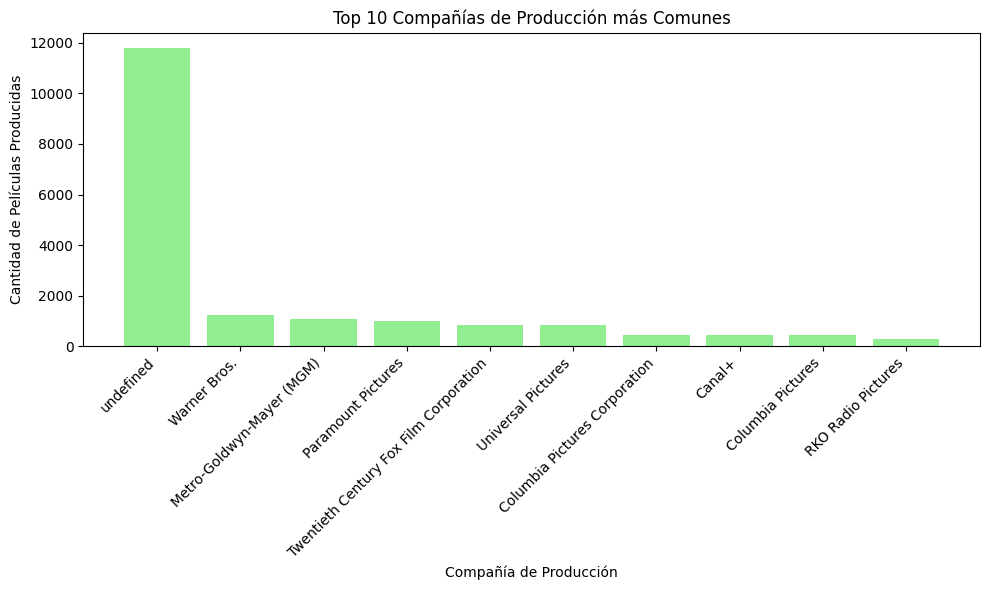

In [26]:
# Obtener los nombres de las compañías de producción correspondientes a los IDs de las 10 compañías más comunes
top_common_company_names = [company for company, _ in top_common_companies]

# Obtener la cantidad de películas producidas por las 10 compañías más comunes
top_common_company_counts = [count for _, count in top_common_companies]

# Generar el gráfico de barras verticales
plt.figure(figsize=(10, 6))
plt.bar(top_common_company_names, top_common_company_counts, color='lightgreen')
plt.xlabel('Compañía de Producción')
plt.ylabel('Cantidad de Películas Producidas')
plt.title('Top 10 Compañías de Producción más Comunes')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

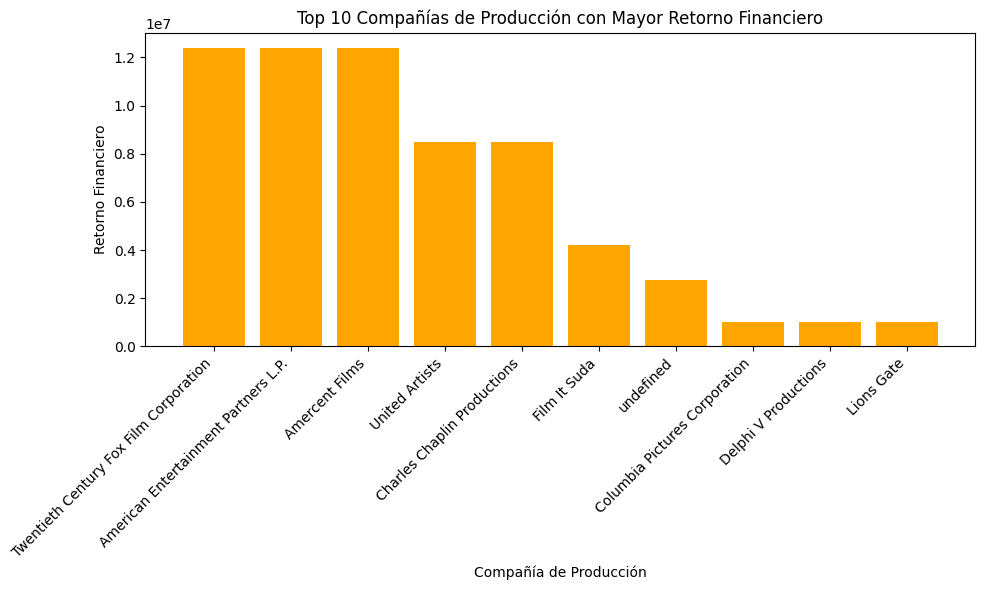

In [27]:
# Convertir los valores de la columna "return" a valores numéricos
df['return'] = pd.to_numeric(df['return'], errors='coerce')

# Calcular el retorno total por compañía de producción
company_return = {}
for index, row in df.iterrows():
    companies = row['production_companies']
    return_value = row['return']
    
    if isinstance(companies, str):
        for company in companies.split(', '):
            if company in company_return:
                company_return[company] += return_value
            else:
                company_return[company] = return_value

# Ordenar las compañías por retorno financiero de mayor a menor
sorted_company_return = sorted(company_return.items(), key=lambda x: x[1], reverse=True)

# Seleccionar las 10 compañías con mayor retorno financiero
top_return_companies = sorted_company_return[:10]

# Obtener los nombres de las compañías de producción correspondientes a los IDs de las 10 compañías con más retorno
top_return_company_names = [company for company, _ in top_return_companies]

# Obtener los retornos financieros de las 10 compañías con más retorno
top_return_values = [return_value for _, return_value in top_return_companies]

# Generar el gráfico de barras verticales
plt.figure(figsize=(10, 6))
plt.bar(top_return_company_names, top_return_values, color='orange')
plt.xlabel('Compañía de Producción')
plt.ylabel('Retorno Financiero')
plt.title('Top 10 Compañías de Producción con Mayor Retorno Financiero')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()



In [34]:
import spacy
from spacy.lang.en.stop_words import STOP_WORDS

# Cargar el modelo de lenguaje en inglés
nlp = spacy.load("en_core_web_sm")

# Función para limpiar y procesar el texto
def clean_text(text):
    doc = nlp(text)
    words = [token.lemma_.lower() for token in doc if not token.is_punct and not token.is_stop]
    return ' '.join(words)

# Aplicar la limpieza a los títulos
df['cleaned_title'] = df['title'].apply(clean_text)

# Obtener todos los títulos limpios como un solo string
all_cleaned_titles = ' '.join(df['cleaned_title'])


In [35]:
# Guardar el DataFrame con los títulos limpios en un archivo CSV
df.to_csv('Dataset/movies_cleaned.csv', index=False)


Análisis de Frecuencia de Palabras

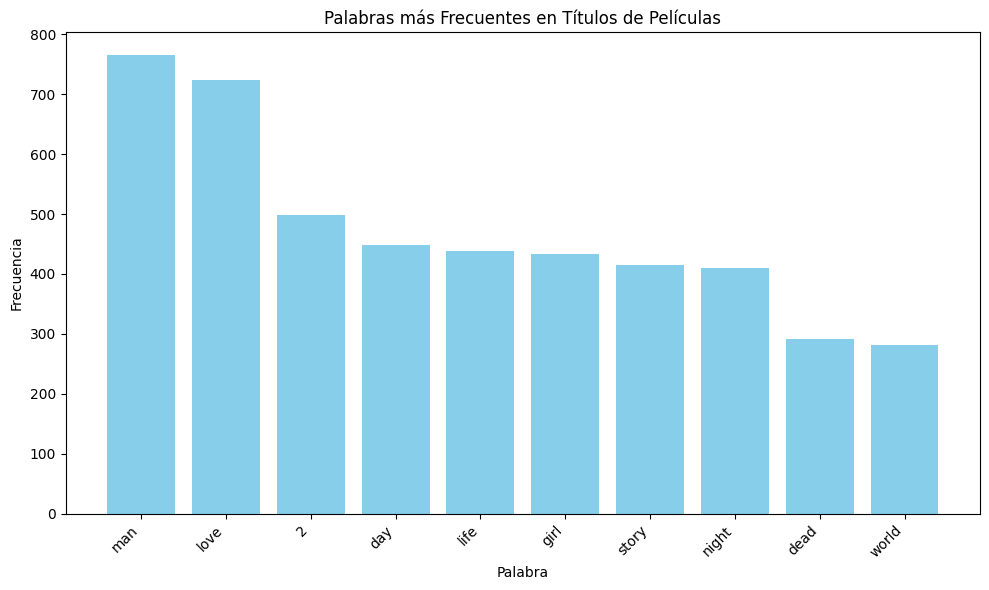

In [37]:
from collections import Counter
import matplotlib.pyplot as plt

# Obtener todas las palabras de los títulos limpios como una lista
all_words = ' '.join(df['cleaned_title']).split()

# Calcular la frecuencia de cada palabra
word_counts = Counter(all_words)

# Obtener las 10 palabras más frecuentes y sus frecuencias
top_words = word_counts.most_common(10)

# Crear un gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(*zip(*top_words), color='skyblue')
plt.xlabel('Palabra')
plt.ylabel('Frecuencia')
plt.title('Palabras más Frecuentes en Títulos de Películas')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.show()


In [ ]:
# Cargar el DataFrame
df = pd.read_csv('Dataset/movies_cleaned.csv')

# Imprimir los valores no numéricos en la columna 'id'
non_numeric_ids = df[~df['id'].astype(str).str.isnumeric()]['id'].unique()
print("Valores no numéricos en la columna 'id':")
print(non_numeric_ids)

# Eliminar registros con valores no numéricos en la columna 'id'
df = df[df['id'].astype(str).str.isnumeric()]

# Guardar el DataFrame en un archivo CSV
df.to_csv('Dataset/movies_cleaned.csv', index=False)

# Mostrar un mensaje de confirmación
print("El DataFrame se ha guardado en el archivo CSV correctamente.")

In [4]:
import pandas as pd

# Cargar el DataFrame de películas
df = pd.read_csv('Dataset/movies_cleaned.csv')

# Lista de columnas a verificar
columns_to_check = df.columns

# Encontrar columnas con valores no serializables
problematic_columns = []
for column in columns_to_check:
    non_serializable_values = [value for value in df[column] if not isinstance(value, (int, float))]
    if non_serializable_values:
        problematic_columns.append(column)

print("Columnas con valores no serializables:", problematic_columns)


Columnas con valores no serializables: ['belongs_to_collection', 'genres', 'original_language', 'overview', 'production_companies', 'production_countries', 'release_date', 'spoken_languages', 'status', 'tagline', 'title', 'genre_ids', 'language_ids', 'country_ids', 'cleaned_title']


Modelo de Recomendación

In [80]:
from fuzzywuzzy import process
import pandas as pd

# Cargar el DataFrame con los títulos limpios
df = pd.read_csv('Dataset/movies_cleaned.csv')

# Elegir la película de interés (asegúrate de que su título sea correcto)
movie_of_interest = 'Toy Stroy'

# Encontrar coincidencias aproximadas de cadenas
similar_movies = process.extract(movie_of_interest, df['title'], limit=10)

# Mostrar las películas similares
for title, score, idx in similar_movies:
    print(title, score)



Troy 90
Toy Story 89
The Christmas Toy 86
Toy Story of Terror! 86
Silent Night, Deadly Night 5: The Toy Maker 86
Toy Story That Time Forgot 86
Toy Reanimator 86
Toy Story 2 80
Tokyo Story 80
Toy Story 3 80


Análisis de Temas

In [39]:
from gensim import corpora, models
from pprint import pprint

# Crear un diccionario de palabras y un corpus
texts = [title.split() for title in df['cleaned_title']]
dictionary = corpora.Dictionary(texts)
corpus = [dictionary.doc2bow(text) for text in texts]

# Crear un modelo de LDA (Latent Dirichlet Allocation)
lda_model = models.LdaModel(corpus, num_topics=5, id2word=dictionary, passes=15)

# Mostrar los temas y sus palabras clave
pprint(lda_model.print_topics(num_words=5))


[(0,
  '0.021*"life" + 0.013*"black" + 0.011*"woman" + 0.010*"death" + '
  '0.010*"house"'),
 (1, '0.029*"man" + 0.020*"day" + 0.019*"girl" + 0.011*"dead" + 0.010*"3"'),
 (2,
  '0.011*"movie" + 0.010*"blood" + 0.010*"war" + 0.009*"king" + 0.008*"good"'),
 (3,
  '0.018*"night" + 0.013*"world" + 0.010*"live" + 0.010*"little" + '
  '0.009*"dark"'),
 (4,
  '0.034*"love" + 0.022*"2" + 0.018*"story" + 0.013*"christmas" + '
  '0.012*"time"')]


Funcion por Idiomas

In [89]:
# Definimos la funcion
def peliculas_idioma(Idioma: str):
    # Contar la cantidad de películas en el idioma especificado
    count = df['spoken_languages'].str.contains(Idioma, case=False, na=False).sum()
    
    return f"{count} cantidad de películas fueron estrenadas en idioma {Idioma}"

# Prueba de la función
idioma = 'español'
resultado = peliculas_idioma(idioma)
print(resultado)



2412 cantidad de películas fueron estrenadas en idioma español


Funcion duracion de Pelicula

In [7]:
# Cargar el DataFrame con los datos
df = pd.read_csv('Dataset/movies_cleaned.csv')

# Definimos la funcion
def peliculas_duracion(Pelicula: str):
    # Buscar la película en el DataFrame
    pelicula_info = df[df['title'] == Pelicula]
    
    if not pelicula_info.empty:
        duracion = int(pelicula_info['runtime'].values[0])
        año = int(pelicula_info['release_year'].values[0])
        return f"{Pelicula}. Duración: {duracion} minutos. Año: {año}"
    else:
        return f"No se encontró información para la película {Pelicula}"

# Prueba de la función
pelicula = 'Jumanji'
resultado = peliculas_duracion(pelicula)
print(resultado)


Jumanji. Duración: 104 minutos. Año: 1995


Funcion franquicias

In [24]:
from fuzzywuzzy import process

def franquicia(Franquicia: str):
    franquicias = df['belongs_to_collection'].str.lower().unique()
    franquicias_with_keywords = [f for f in franquicias if "harry" in f or "potter" in f]
    
    closest_exact_match = None
    closest_matches = []
    
    for f in franquicias_with_keywords:
        if Franquicia.lower() == f:
            closest_exact_match = f
            break
        else:
            closest_matches.append(f)
    
    if closest_exact_match:
        franquicia_info = df[df['belongs_to_collection'].str.lower() == closest_exact_match]
        peliculas_count = franquicia_info.shape[0]
        ganancia_total = franquicia_info['revenue'].sum()
        ganancia_promedio = ganancia_total / peliculas_count
        return {
            "resultado": f"{closest_exact_match} - Películas: {peliculas_count}, Ganancia total: {ganancia_total}, Ganancia promedio: {ganancia_promedio}"
        }
    elif closest_matches:
        results = []
        for closest_franquicia in closest_matches[:3]:
            franquicia_info = df[df['belongs_to_collection'].str.lower() == closest_franquicia]
            peliculas_count = franquicia_info.shape[0]
            ganancia_total = franquicia_info['revenue'].sum()
            ganancia_promedio = ganancia_total / peliculas_count
            results.append({
                "franquicia": closest_franquicia,
                "peliculas_count": peliculas_count,
                "ganancia_total": ganancia_total,
                "ganancia_promedio": ganancia_promedio
            })
        
        resultados_text = "\n".join([
            f"{r['franquicia']} - Películas: {r['peliculas_count']}, Ganancia total: {r['ganancia_total']}, Ganancia promedio: {r['ganancia_promedio']}"
            for r in reversed(results)
        ])
        return {"resultados": resultados_text}
    else:
        return {"resultado": f"No se encontraron resultados para la franquicia {Franquicia}"}

# Prueba de la función con una franquicia similar
franquicia("Harry Potter collection")

{'resultado': 'harry potter collection - Películas: 8, Ganancia total: 7707367425, Ganancia promedio: 963420928.125'}

Funcion pais

In [27]:
from fuzzywuzzy import process

def peliculas_pais(Pais: str):
    pais_lower = Pais.lower()
    paises = df['production_countries'].str.lower().unique()
    
    closest_exact_match = None
    closest_matches = []
    
    for pais in paises:
        if pais_lower == pais:
            closest_exact_match = pais
            break
        else:
            closest_matches.append(pais)
    
    if closest_exact_match:
        count = df['production_countries'].str.lower().str.contains(closest_exact_match, case=False, na=False).sum()
        return {"resultado": f"Se produjeron {count} películas en el país {Pais}"}
    elif closest_matches:
        results = []
        for closest_pais in closest_matches[:3]:
            count = df['production_countries'].str.lower().str.contains(closest_pais, case=False, na=False).sum()
            results.append({
                "pais": closest_pais,
                "cantidad_peliculas": count
            })
        
        resultados_text = "\n".join([
            f"Se produjeron {r['cantidad_peliculas']} películas en el país {r['pais']}"
            for r in reversed(results)
        ])
        return {"resultados": resultados_text}
    else:
        return {"resultado": f"No se encontraron resultados para el país {Pais}"}

# Prueba de la función con un país similar
peliculas_pais("United States")


{'resultados': 'Se produjeron 933 películas en el país united kingdom, united states of america\nSe produjeron 281 películas en el país germany, united states of america\nSe produjeron 21147 películas en el país united states of america'}

Funcion producciones

In [30]:
def productoras_exitosas(Productora: str):
    productora_lower = Productora.lower()
    productoras = df['production_companies'].str.lower().unique()
    
    closest_exact_match = None
    closest_matches = []
    
    for productora in productoras:
        if productora_lower == productora:
            closest_exact_match = productora
            break
        else:
            closest_matches.append(productora)
    
    if closest_exact_match:
        productora_info = df[df['production_companies'].str.lower() == closest_exact_match]
        peliculas_count = productora_info.shape[0]
        ganancia_total = productora_info['revenue'].sum()
        return {
            "resultado": f"La productora {Productora} ha tenido un revenue de {ganancia_total} y realizó {peliculas_count} películas"
        }
    elif closest_matches:
        results = []
        for closest_productora in closest_matches[:3]:
            productora_info = df[df['production_companies'].str.lower() == closest_productora]
            peliculas_count = productora_info.shape[0]
            ganancia_total = productora_info['revenue'].sum()
            results.append({
                "productora": closest_productora,
                "peliculas_count": peliculas_count,
                "ganancia_total": ganancia_total
            })
        
        resultados_text = "\n".join([
            f"La productora {r['productora']} ha tenido un revenue de {r['ganancia_total']} y realizó {r['peliculas_count']} películas"
            for r in reversed(results)
        ])
        return {"resultados": resultados_text}
    else:
        return {"resultado": f"No se encontraron resultados para la productora {Productora}"}

# Prueba de la función con una productora similar
productoras_exitosas("Warner Bros. Pictures")


{'resultado': 'La productora Warner Bros. Pictures ha tenido un revenue de 28972508 y realizó 6 películas'}

Funcion director

In [66]:
import pandas as pd
from fuzzywuzzy import process

# Cargar el DataFrame de películas
df = pd.read_csv('Dataset/movies_cleaned.csv')

# Cargar el DataFrame de créditos
credits_df = pd.read_csv('Dataset/credits_cleaned.csv')

def get_director(nombre_director: str):
    director_lower = nombre_director.lower()
    
    # Buscar las películas asociadas al director
    closest_match = process.extractOne(director_lower, credits_df['directors'].str.lower(), score_cutoff=80)
    
    if closest_match:
        closest_director = closest_match[0]
        director_movies = credits_df[credits_df['directors'].str.lower() == closest_director]
        director_ids = director_movies['id'].tolist()
        
        # Calcular el éxito del director
        total_return = 0
        for movie_id in director_ids:
            movie_info = df[df['id'] == movie_id]
            if not movie_info.empty:
                total_return += movie_info.iloc[0]['return']
        
        resultados = []
        for movie_id in director_ids:
            movie_info = df[df['id'] == movie_id]
            if not movie_info.empty:
                row = movie_info.iloc[0]
                resultados.append({
                    "titulo": row['title'],
                    "fecha_lanzamiento": row['release_date'],
                    "retorno_individual": row['return'],
                    "costo": row['budget'],
                    "ganancia": row['revenue']
                })
        
        return {
            "nombre_director": closest_director.capitalize(),
            "exito_director": f"Exito del director {closest_director.capitalize()}: {total_return:.2f}",
            "resultados": resultados
        }
    else:
        return {"resultado": f"No se encontraron resultados para el director {nombre_director}"}

# Prueba de la función con un director similar
get_director("John Lasseter")


{'nombre_director': 'John lasseter',
 'exito_director': 'Exito del director John lasseter: 21.01',
 'resultados': [{'titulo': 'Toy Story',
   'fecha_lanzamiento': '1995-10-30',
   'retorno_individual': 12.4518011,
   'costo': 30000000,
   'ganancia': 373554033},
  {'titulo': "A Bug's Life",
   'fecha_lanzamiento': '1998-11-25',
   'retorno_individual': 3.027157158333333,
   'costo': 120000000,
   'ganancia': 363258859},
  {'titulo': 'Toy Story 2',
   'fecha_lanzamiento': '1999-10-30',
   'retorno_individual': 5.526298544444445,
   'costo': 90000000,
   'ganancia': 497366869},
  {'titulo': 'Luxo Jr.',
   'fecha_lanzamiento': '1986-08-17',
   'retorno_individual': 0.0,
   'costo': 0,
   'ganancia': 0},
  {'titulo': 'Tin Toy',
   'fecha_lanzamiento': '1988-08-01',
   'retorno_individual': 0.0,
   'costo': 0,
   'ganancia': 0},
  {'titulo': "Red's Dream",
   'fecha_lanzamiento': '1987-08-17',
   'retorno_individual': 0.0,
   'costo': 0,
   'ganancia': 0},
  {'titulo': 'Knick Knack',
   'fe

In [83]:

print(df.columns)


Index(['belongs_to_collection', 'budget', 'genres', 'id', 'original_language',
       'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'vote_average',
       'vote_count', 'release_year', 'return', 'genre_ids', 'language_ids',
       'country_ids', 'cleaned_title'],
      dtype='object')


In [40]:
credits_df.head()

,id,actors,directors
0,862,"Tom Hanks, Tim Allen, Don Rickles, Jim Varney,...",John Lasseter
1,8844,"Robin Williams, Jonathan Hyde, Kirsten Dunst, ...",Joe Johnston
2,15602,"Walter Matthau, Jack Lemmon, Ann-Margret, Soph...",Howard Deutch
3,31357,"Whitney Houston, Angela Bassett, Loretta Devin...",Forest Whitaker
4,11862,"Steve Martin, Diane Keaton, Martin Short, Kimb...",Charles Shyer


In [8]:
import pandas as pd

# Cargar el DataFrame credits_df desde el archivo CSV
credits_df = pd.read_csv('Dataset/credits_cleaned.csv')

# Contar cuántas veces aparece "Steven Spielberg" en la columna 'directors'
steven_spielberg_count = credits_df['directors'].str.lower().str.count('john lasseter').sum()

print(f"Steven Spielberg aparece {steven_spielberg_count} veces en credits_df.")


Steven Spielberg aparece 10.0 veces en credits_df.
